In [29]:
from collections import Counter
from math import sqrt

import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.sparse.linalg import spsolve
from scipy.stats import multivariate_normal

In [30]:
# Task 1
arr1_py = [[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]
arr1_np = np.array(arr1_py)


def diagonal_product_py(arr):
    product = 1
    for i in range(len(arr[0])):
        el = arr[i][i]
        if el:
            product *= el
    return product


def diagonal_product_np(arr):
    diagonal = np.diag(arr)
    return np.prod(diagonal[diagonal != 0])


print("py:", end=" ")
%timeit diagonal_product_py(arr1_py)
print("np:", end=" ")
%timeit diagonal_product_np(arr1_np)

py: 422 ns ± 52.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
np: 7.01 µs ± 85.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [31]:
# Task 2
arr2_py = [[9, 4, 2], [6, 0, 0], [9, 9, 3]]
i2_py = [1, 2, 1]
j2_py = [1, 0, 1]

arr2_np = np.array(arr2_py)
i2_np = np.array(i2_py)
j2_np = np.array(j2_py)


def vector_py(arr, i, j):
    vector = []
    for k in range(len(i)):
        vector.append(arr[i[k]][j[k]])
    return vector


def vector_np(arr, i, j):
    return arr[i,j]


print("py:", end=" ")
%timeit vector_py(arr2_py, i2_py, j2_py)
print("np:", end=" ")
%timeit vector_np(arr2_np, i2_np, j2_np)

py: 485 ns ± 3.72 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
np: 2.18 µs ± 40.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [32]:
# Task 3
x3_py = [1, 2, 2, 4]
y3_py = [4, 2, 1, 2]

x3_np = np.array(x3_py)
y3_np = np.array(y3_py)


def equal_py(arr1, arr2):
    return sorted(arr1) == sorted(arr2)


def equal_np(arr1, arr2):
    return np.array_equal(np.bincount(arr1), np.bincount(arr2))


print("py:", end=" ")
%timeit equal_py(x3_py, y3_py)
print("np:", end=" ")
%timeit equal_np(x3_np, y3_np)

py: 344 ns ± 3.81 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
np: 5.57 µs ± 476 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [33]:
# Task 4
x4_py = [6, 2, 0, 3, 0, 0, 5, 7, 0]
x4_np = np.array(x4_py)


def null_max_py(arr):
    count = 0
    for i in range(1, len(arr)):
        if not arr[i-1] and arr[i] > count:
                count = arr[i]
    return count


def null_max_np(arr):
    # zero_indexes = np.where(arr == 0)
    zero_indexes = arr == 0
    return arr[1:][zero_indexes[:-1]].max()

print("py:", end=" ")
%timeit null_max_py(x4_py)
print("np:", end=" ")
%timeit null_max_np(x4_np)

py: 637 ns ± 53.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
np: 3.03 µs ± 24.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


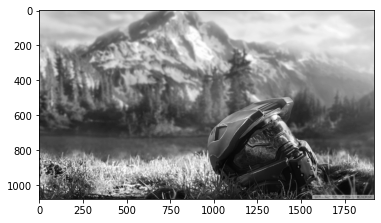

py: 840 ms ± 3.16 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
np: 44.4 ms ± 220 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [34]:
# Task 5
photo_arr = plt.imread("img.png")
photo_arr_py = photo_arr.tolist()
photo_arr_np = np.array(photo_arr_py)
rgb_ration_py = [0.2989, 0.587, 0.114]
rgb_ration_np = np.array(rgb_ration_py)


def gray_py(arr, rgb_ration):
    result_arr = []
    for height in arr:
        new_width = []
        for width in height:
            color = 0
            for i in range(3):
                color += width[i] * rgb_ration[i]
            new_width.append(color)
        result_arr.append(new_width)

    return result_arr

    
def gray_np(arr, rgb_ration):
    return np.dot(arr[...,:3], rgb_ration)


arr_py = gray_np(photo_arr, rgb_ration_py)
plt.imshow(arr_py, cmap='gray')
plt.show()

print("py:", end=" ")
%timeit gray_py(photo_arr_py, rgb_ration_py)
print("np:", end=" ")
%timeit gray_np(photo_arr_np, rgb_ration_np)

In [35]:
# Task 6
arr6_py = [2, 2, 2, 3, 3, 3, 5]
arr6_np = np.array(arr6_py)


def counts_py(arr):
    return tuple(zip(*Counter(arr).items()))


def counts_np(arr):
    bin_count = np.bincount(arr)
    non_zero_indexes = np.nonzero(bin_count)[0]
    return non_zero_indexes, bin_count[non_zero_indexes]

print("py:", end=" ")
%timeit counts_py(arr6_py)
print("np:", end=" ")
%timeit counts_np(arr6_np)

py: 1.85 µs ± 27 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
np: 2.21 µs ± 30.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [36]:
# Task 7
x7_py = [2, 7, 6, 6, 9, 6, 3, 4, 9]
y7_py = [1, 0, 0, 7, 2, 2, 4, 3, 0]

x7_np = np.array(x7_py)
y7_np = np.array(y7_py)


def euclid_py(arr_x, arr_y):
    return sqrt(sum((x - y) ** 2.0 for x, y in zip(arr_x, arr_y)))


def euclid_np(arr_x, arr_y):
    return np.linalg.norm(arr_x - arr_y)


print("py:   ", end=" ")
%timeit euclid_py(x7_py, y7_py)
print("scipy:", end=" ")
%timeit scipy.spatial.distance.euclidean(x7_py, y7_py)
print("np:   ", end=" ")
%timeit euclid_np(x7_np, y7_np)

py:    2.07 µs ± 84.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
scipy: 9.8 µs ± 403 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
np:    4.44 µs ± 25.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [37]:
# Task 8
sigma = np.array([
    [2.3, 0, 0, 0],
    [0, 1.5, 0, 0],
    [0, 0, 1.7, 0],
    [0, 0, 0, 2]
])
mu = np.array([2, 3, 8, 10])
x = np.array([2.1, 3.5, 8, 9.5])


def logarithm(x, mu, S):
    norm_coefficient = len(S) * np.log(2 * np.pi) + np.linalg.slogdet(S)[1]
    err = x - mu
    numerator = spsolve(S, err).T.dot(err)
    return -0.5 * (norm_coefficient + numerator)


print("np:   ", end=" ")
%timeit logarithm(x, mu, sigma)
print("scipy:", end=" ")
%timeit multivariate_normal(mu, sigma).logpdf(x)

np:    195 µs ± 834 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
scipy: 149 µs ± 2.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
